# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import cv2
import math
import numpy as np
from sklearn.utils import shuffle

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
dict_label={}
for v in y_train:
    dict_label[v]=0
for v in y_test:
    dict_label[v]=0
for v in y_valid:
    dict_label[v]=0
len(dict_label)

43

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2],1)

# TODO: How many unique classes/labels there are in the dataset.
dict_label={}
for v in y_train:
    dict_label[v]=0
for v in y_test:
    dict_label[v]=0
for v in y_valid:
    dict_label[v]=0

n_classes = len(dict_label)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

<Container object of 43 artists>

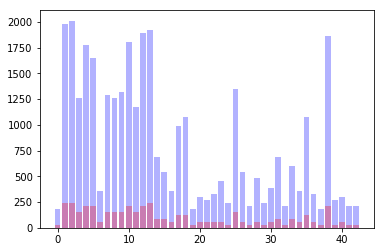

In [6]:
train_label=np.zeros(len(dict_label))
for v in y_train:
    train_label[v]+=1
valid_label=np.zeros(len(dict_label))
for v in y_valid:
    valid_label[v]+=1
plt.bar(range(len(train_label)),train_label,alpha=0.3,color='b')
plt.bar(range(len(valid_label)),valid_label,alpha=0.3,color='r')

In [7]:
# try to generate fake data
# idea: affine transform to image
def generateFake(img):
    q0 = math.ceil(image_shape[0]/4)
    q1 = math.ceil(image_shape[1]/4)
    r=np.random.normal(0, 0.5,6)
    pts1 = np.float32([[q0     ,q1]     ,[q0     ,q1*3]     ,[q0*3     ,q1*3]])
    pts2 = np.float32([[q0+r[0],q1+r[1]],[q0+r[2],q1*3+r[3]],[q0*3+r[4],q1*3+r[5]]])
    
    dst = np.zeros((image_shape[0],image_shape[1],3), np.uint8)
    mean =cv2.mean(img)
    dst[:,:] =(mean[0],mean[1],mean[2])
    Mat = cv2.getAffineTransform(pts1,pts2)

    return cv2.warpAffine(img,Mat,(image_shape[0],image_shape[1]),dst, borderMode=cv2.BORDER_TRANSPARENT)
    

In [8]:
cv2.mean(X_train[0])

(47.5390625, 42.814453125, 41.2919921875, 0.0)

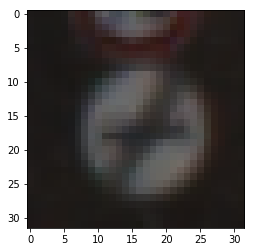

In [9]:
plt.imshow(X_train[0])

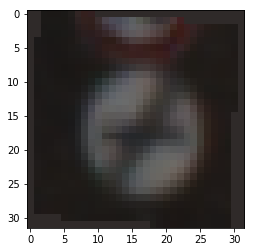

In [10]:
plt.imshow(generateFake(X_train[0]))

In [11]:
train_label=np.zeros(len(dict_label))
X_train_fake=[]
y_train_fake=[]
for v in y_train:
    train_label[v]+=1
for c in range(n_classes):
    # amplify datas
    data_num = 0
    indexes = [i for i, lbl in enumerate(y_train) if lbl == c]
    while data_num < 3000:
        index=np.random.choice(indexes)
        X_train_fake.append(generateFake(X_train[index]))
        y_train_fake.append(c)
        data_num+=1
        
valid_label=np.zeros(len(dict_label))
X_valid_fake=[]
y_valid_fake=[]
for v in y_valid:
    valid_label[v]+=1
for c in range(n_classes):
    # amplify datas
    data_num = 0
    indexes = [i for i, lbl in enumerate(y_valid) if lbl == c]
    while data_num < 500:
        index=np.random.choice(indexes)
        X_valid_fake.append(generateFake(X_valid[index]))
        y_valid_fake.append(c)
        data_num+=1

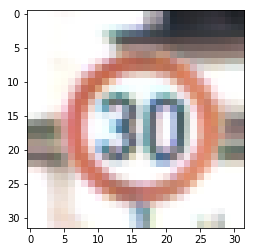

In [12]:
plt.imshow(X_train[2295])

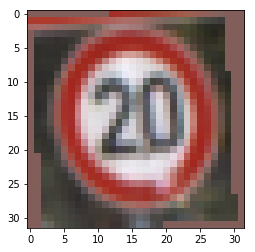

In [13]:
plt.imshow(X_train_fake[2])

<Container object of 43 artists>

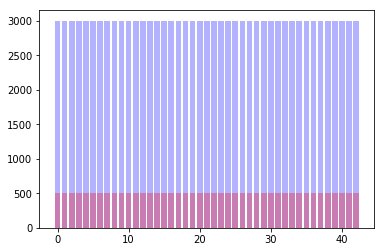

In [14]:
train_label=np.zeros(len(dict_label))
for v in y_train_fake:
    train_label[v]+=1
valid_label=np.zeros(len(dict_label))
for v in y_valid_fake:
    valid_label[v]+=1
plt.bar(range(len(train_label)),train_label,alpha=0.3,color='b')
plt.bar(range(len(valid_label)),valid_label,alpha=0.3,color='r')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

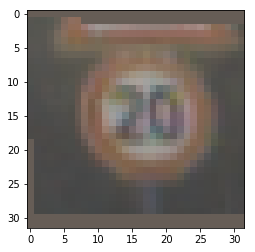

In [15]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
plt.imshow(X_train_fake[0])

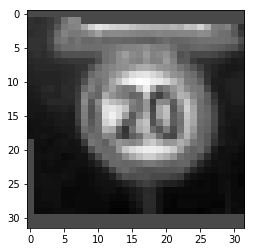

In [16]:
# convert to grayscale
gray=np.zeros(image_shape)
gray=cv2.cvtColor(X_train_fake[0],cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.gray()

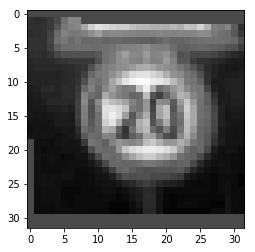

In [17]:
# normalize image
norm=np.zeros(image_shape)
norm = cv2.normalize(gray,norm,alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
#cv2.normalize(gray, norm, 0, 255, cv2.NORM_MINMAX)
plt.imshow(norm)

In [18]:
def preProcessImage(src):
    gray=np.zeros(image_shape)
    gray=cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
    norm=np.zeros(image_shape)
    norm = cv2.normalize(gray,norm,alpha=0, beta=1.0, norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
    return norm

In [19]:
X_train_prepro=[]
for im in X_train:
    X_train_prepro.append(np.reshape(preProcessImage(im),(32,32,1)))
#plt.imshow(X_train_prepro[-1])

In [20]:
X_test_prepro=[]
for im in X_test:
    X_test_prepro.append(np.reshape(preProcessImage(im),(32,32,1)))
#plt.imshow(X_test_prepro[-1])

In [21]:
X_valid_prepro=[]
for im in X_valid:
    X_valid_prepro.append(np.reshape(preProcessImage(im),(32,32,1)))
#plt.imshow(X_valid_prepro[-1])

In [22]:
X_train_fake_prepro=[]
for im in X_train_fake:
    X_train_fake_prepro.append(np.reshape(preProcessImage(im),(32,32,1)))

In [23]:
X_valid_fake_prepro=[]
for im in X_valid_fake:
    X_valid_fake_prepro.append(np.reshape(preProcessImage(im),(32,32,1)))

### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 100
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv1 = tf.nn.dropout(conv1,0.7)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 = tf.nn.dropout(conv2,0.5)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [25]:
def DeepNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    global conv1
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 30x30x6. Output = 15x15x6.
    #conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 28x28x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    global conv2
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 28x28x16. Output = 14x14x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Output = 12x12x26.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 26), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(26))
    global conv3
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Layer 4: Convolutional. Output = 10x10x36.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 26, 36), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(36))
    global conv4
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b

    # Activation.
    conv4 = tf.nn.relu(conv4)
    # Pooling. Input = 11x11x36. Output = 5x5x36.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 5: Convolutional. Output = 1x1x4000.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 36, 4000), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(4000))
    global conv5
    conv5 = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b

    # Activation.
    conv5 = tf.nn.relu(conv5)
    
    # Flatten. Input = 1x1x400. Output = 4000.
    fc0   = flatten(conv5)

    # Layer 3: Fully Connected. Input = 4000. Output = 2000.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(4000, 2000), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2000))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob1)
    
    # Layer 4: Fully Connected. Input = 2000. Output = 1000
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(2000, 1000), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1000))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob2)

    # Layer 4: Fully Connected. Input = 1000. Output = 500
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1000, 500), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(500))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b

    # Activation.
    fc3    = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob3)

    # Layer 4: Fully Connected. Input = 500. Output = 100
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(500, 100), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(100))
    fc4    = tf.matmul(fc3, fc4_W) + fc4_b

    # Activation.
    fc4    = tf.nn.relu(fc4)
    fc4 = tf.nn.dropout(fc4, keep_prob4)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc5_W  = tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma))
    fc5_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc4, fc5_W) + fc5_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [26]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
keep_prob3 = tf.placeholder(tf.float32)
keep_prob4 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [27]:
rate = 0.001

logits = DeepNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [28]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [29]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [30]:
# Training the Modle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_fake_prepro)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_fake_prepro, y_train_fake = shuffle(X_train_fake_prepro, y_train_fake)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_fake_prepro[offset:end], y_train_fake[offset:end]
            sess.run(training_operation,feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.8,keep_prob2: 0.8,keep_prob3:0.8,keep_prob4:0.5})
            
        validation_accuracy = evaluate(X_valid_fake_prepro, y_valid_fake)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Deepnet')
    print("Model saved")
    test_accuracy = evaluate(X_test_prepro, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.954

EPOCH 2 ...
Validation Accuracy = 0.957

EPOCH 3 ...
Validation Accuracy = 0.945

EPOCH 4 ...
Validation Accuracy = 0.941

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.962

EPOCH 8 ...
Validation Accuracy = 0.965

EPOCH 9 ...
Validation Accuracy = 0.962

EPOCH 10 ...
Validation Accuracy = 0.955

Model saved
Test Accuracy = 0.948


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

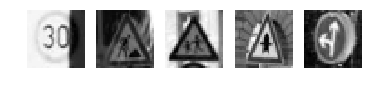

In [31]:
import glob
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
img_flist=glob.glob('img/*')
fig, ax = plt.subplots(1,len(img_flist))
img=np.zeros([32,32])
img_list=np.zeros([len(img_flist),32,32,1])
for im in range(len(img_flist)):
    ax[im].axis('off')
    img = preProcessImage(cv2.imread(img_flist[im]))
    ax[im].imshow(img)
    img_list[im] = np.reshape(img,(32,32,1))

### Predict the Sign Type for Each Image

In [32]:
import pandas as pd

df = pd.read_csv('signnames.csv')
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [33]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
label_web=[1,25,28,11,37]
print('True label of images')
for i in range(len(label_web)):
    print('Image',i+1,':',df['SignName'][label_web[i]])
with tf.Session() as sess:
    saver.restore(sess,'./Deepnet')
    web_predict=sess.run(logits, feed_dict={x:img_list,keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
    result = np.argmax(web_predict,1)
    print('Result of Predict')
    for i in range(len(result)):
        print('Image',i+1,':',df['SignName'][result[i]])

True label of images
Image 1 : Speed limit (30km/h)
Image 2 : Road work
Image 3 : Children crossing
Image 4 : Right-of-way at the next intersection
Image 5 : Go straight or left
Result of Predict
Image 1 : Speed limit (30km/h)
Image 2 : Road work
Image 3 : Children crossing
Image 4 : Right-of-way at the next intersection
Image 5 : Go straight or left


### Analyze Performance

All prediction is correct.
So accuracy is 1.0.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([  1.00000000e+00,   1.36987222e-09,   2.18211185e-10,
         8.36052256e-13,   3.05288184e-13], dtype=float32), indices=array([1, 4, 2, 0, 5], dtype=int32))
TopKV2(values=array([  1.00000000e+00,   6.56038717e-16,   6.68115228e-18,
         1.08783375e-19,   6.38254241e-20], dtype=float32), indices=array([25, 26, 31, 22,  5], dtype=int32))
TopKV2(values=array([  1.00000000e+00,   1.25605060e-18,   9.08736504e-25,
         5.72260376e-28,   3.21337319e-28], dtype=float32), indices=array([28, 23, 20, 11, 29], dtype=int32))
TopKV2(values=array([  1.00000000e+00,   1.40411083e-09,   3.75924777e-11,
         1.43124609e-11,   3.17421497e-14], dtype=float32), indices=array([11, 30, 27, 28, 21], dtype=int32))
TopKV2(values=array([  1.00000000e+00,   9.57622759e-10,   6.47817494e-11,
         6.96238987e-12,   3.33516678e-12], dtype=float32), indices=array([37, 10, 39, 35, 31], dtype=int32))


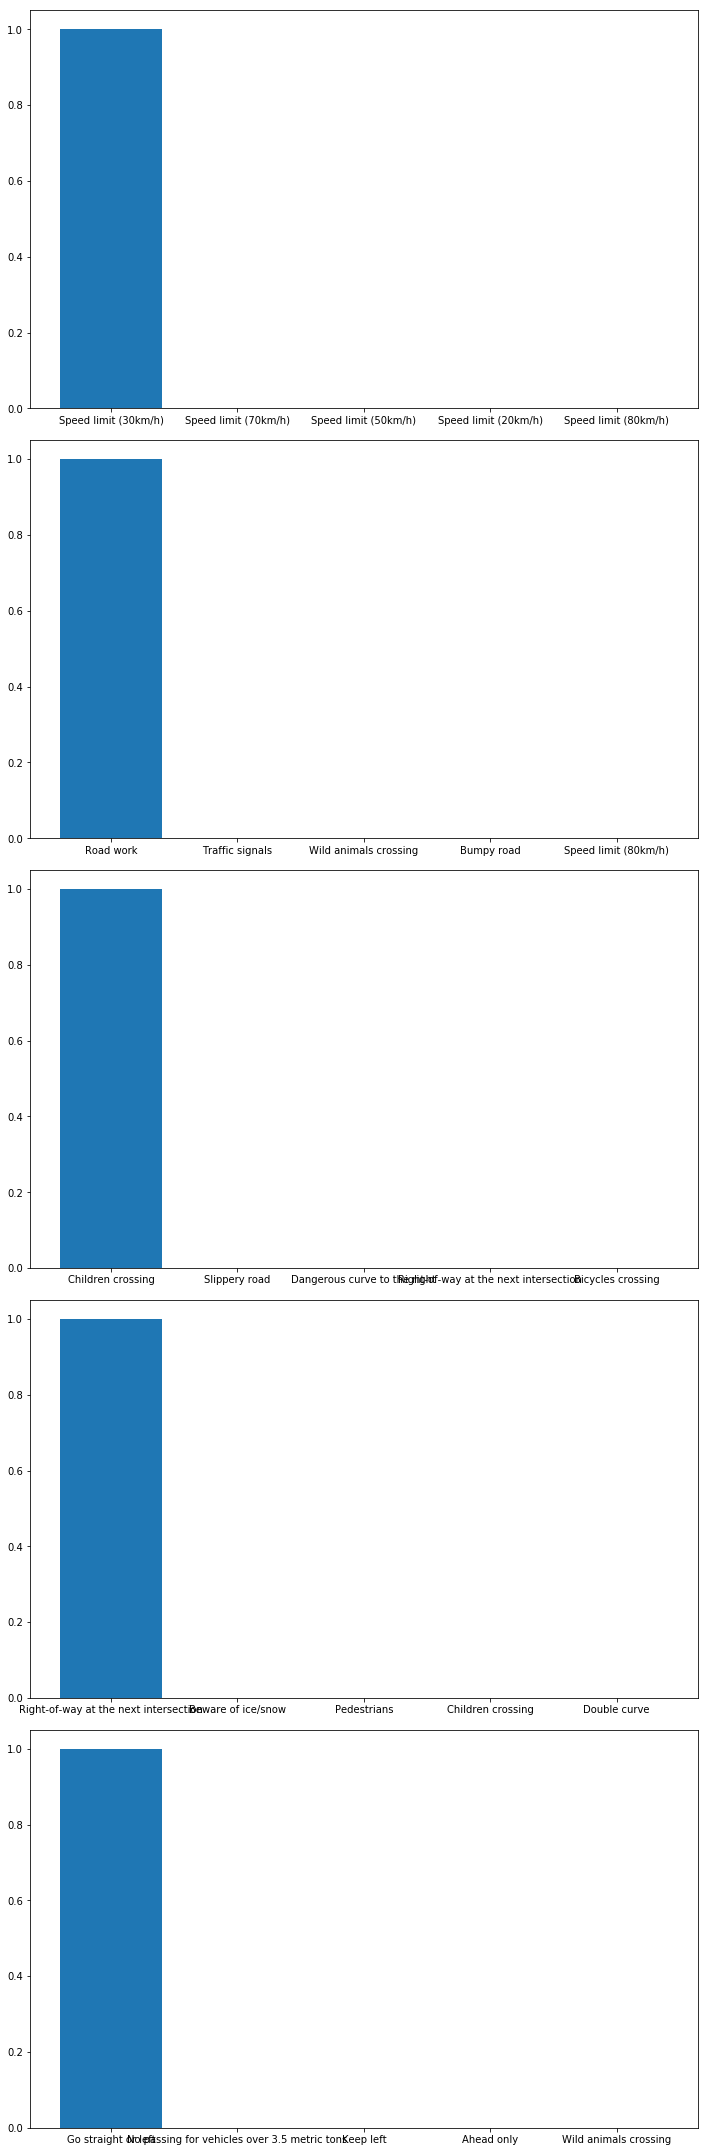

In [34]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess,'./Deepnet')
    web_predict=sess.run(logits, feed_dict={x:img_list,keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
    fig, ax = plt.subplots(len(web_predict),1,figsize=(10, 30))
    plt.tight_layout()
    for s in range(len(web_predict)):
        softm=sess.run(tf.nn.softmax(web_predict[s]))
        top5=sess.run(tf.nn.top_k(tf.constant(softm), k=5))
        print(top5)
        l=['a','a','a','a','a','a']
        for i in range(5):
            l[i+1]=df['SignName'][top5.indices[i]]
            #print(l[i])
        ax[s].set_xticklabels(l)
        ax[s].bar(range(5),top5.values,align="center")

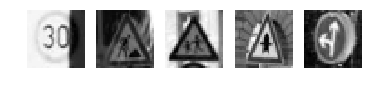

In [35]:

fig, ax = plt.subplots(1,len(img_flist))
img=np.zeros([32,32])
img_list=np.zeros([len(img_flist),32,32,1])
for im in range(len(img_flist)):
    ax[im].axis('off')
    img = preProcessImage(cv2.imread(img_flist[im]))
    ax[im].imshow(img)
    img_list[im] = np.reshape(img,(32,32,1))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [36]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

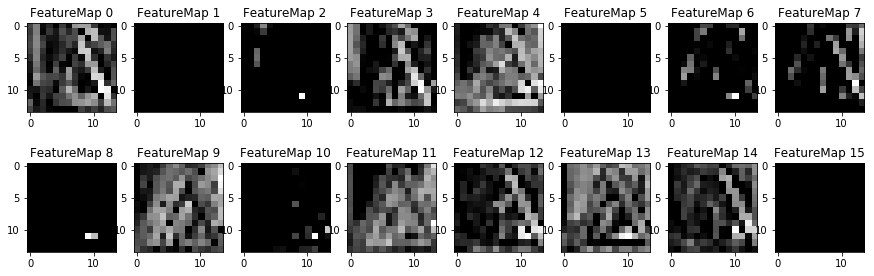

In [37]:
with tf.Session() as sess:
    saver.restore(sess,'./Deepnet')
    act1=outputFeatureMap(np.reshape(img_list[1],(1,32,32,1)),conv2)

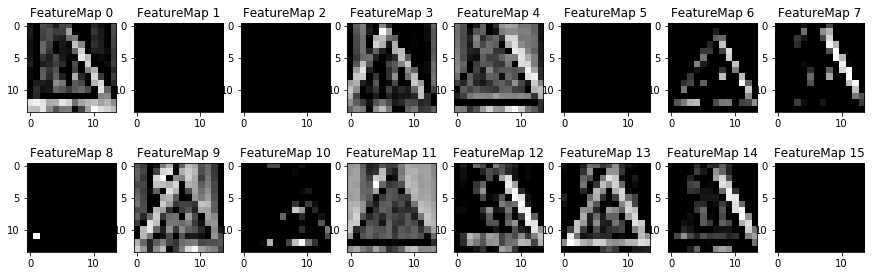

In [38]:
with tf.Session() as sess:
    saver.restore(sess,'./Deepnet')
    act1=outputFeatureMap(np.reshape(img_list[2],(1,32,32,1)),conv2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**
When the classifier makes an erroneous prediction, it can comprehend what kind of image is not enough for learning by comparing the feature map.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

#### 1. Provide a basic summary of the data set and identify where in your code the summary was done. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

The code for this step is contained in the second code cell of the IPython notebook.

I used the numpy to calculate summary statistics of the traffic signs data set:

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43

#### 2. Include an exploratory visualization of the dataset and identify where the code is in your code file.

The code for this step is contained in the third code cell of the IPython notebook.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data ...

<Container object of 43 artists>

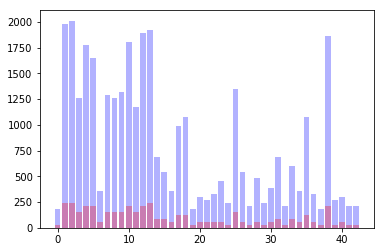

In [39]:
train_label=np.zeros(len(dict_label))
for v in y_train:
    train_label[v]+=1
valid_label=np.zeros(len(dict_label))
for v in y_valid:
    valid_label[v]+=1
plt.bar(range(len(train_label)),train_label,alpha=0.3,color='b')
plt.bar(range(len(valid_label)),valid_label,alpha=0.3,color='r')

### Design and Test a Model Architecture

#### 1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

The code for this step is contained in the 18th code cell of the IPython notebook.

As a first step, I decided to convert the images to grayscale because the LeNet Architecture accept 1 channel image.

Here is an example of a traffic sign image before and after grayscaling.

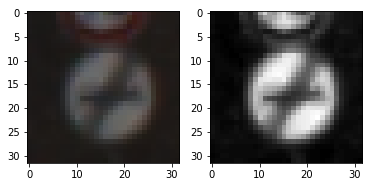

In [40]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_train[0])
ax[1].imshow(cv2.cvtColor(X_train[0],cv2.COLOR_RGB2GRAY))

As a last step, I normalized the image data because the images have different contrast.
Here is an example of a traffic sign image before and after normalization.

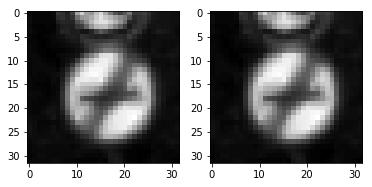

In [41]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(X_train[0],cv2.COLOR_RGB2GRAY))
ax[1].imshow(preProcessImage(X_train[0]))

#### 2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

My final training set had 42000 number of images. My validation set and test set had 4410 and 12630 number of images.

The seventh code cell of the IPython notebook contains the code for augmenting the data set. I decided to generate additional data because the umber of examples per label is not equal.
To add more data to the the data set, I used the affine transformation because it's same as changing camera angle.
Here is an example of an original image and an augmented image:

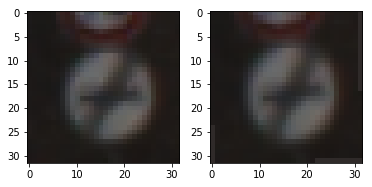

In [42]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_train[0])
ax[1].imshow(generateFake(X_train[0]))

#### 3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The code for my final model is located in the 25th cell of the ipython notebook.

My final model consisted of the following layers:

| Layer                    | Description | 
|:-------------------------|:------------|
| Input                    | 32x32x1 image |
| Convolution 3*3          | 1x1 stride, valid padding, outputs 30x30x6   |
| RELU                     |  　　|
| Convolution 3*3          | 1x1 stride, valid padding, outputs 28x28x16   |
| RELU                     |  　　|
| Max pooling              | 2x2 stride, outputs 14x14x16　|
| Convolution 3*3          | 1x1 stride, valid padding, outputs 12x12x26   |
| RELU                     |  　　|
| Convolution 3*3          | 1x1 stride, valid padding, outputs 10x10x36   |
| RELU                     |  　　|
| Max pooling              | 2x2 stride, outputs 5x5x36　|
| Convolution 5*5          |   1x1 stride, valid padding, outputs 1x1x4000   |
| RELU                     |  　　|
| Fully connected          | outputs 2000   |
| RELU                     |  　　|
| Fully connected          | outputs 1000   |
| RELU                     |  　　|
| Fully connected          | outputs 500   |
| RELU                     |  　　|
| Fully connected          | outputs 100   |
| RELU                     |  　　|
| Fully connected          | outputs 84   |
| RELU                     |  　　|
| Fully connected          | outputs 42   |

#### 5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

The code for calculating the accuracy of the model is located in the below cell of the Ipython notebook.

My final model results were:


In [43]:
with tf.Session() as sess:
    saver.restore(sess,'./Deepnet')
    training_accuracy = sess.run(accuracy_operation, feed_dict={x: X_train_prepro, y: y_train, keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
    print('training set accuracy of ',training_accuracy)
    validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid_prepro, y: y_valid, keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
    print('validation set accuracy of ',validation_accuracy)
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test_prepro, y: y_test, keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
    print('test set accuracy of ',test_accuracy)

training set accuracy of  0.996666
validation set accuracy of  0.972336
test set accuracy of  0.947744


When trying LeNet for the first time, learning with noise added data did not work well.
So I tried a deeper network, and the prediction result improved.

6.About the training  
This is the hyperparameter which I use.  
About epoch and batch size, I tried several combinations and chose things that learned satisfactorily.  
I chose a small value for batch size from the viewpoint of memory consumption.

| parameter     | value | 
|:--------------|:-------|  
| learning rate | 0.001  |  
| epochs        |  10    |  
| batch size    | 100    |  

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

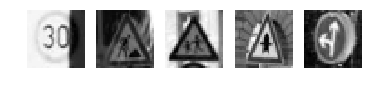

In [44]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
img_flist=glob.glob('img/*')
fig, ax = plt.subplots(1,len(img_flist))
img=np.zeros([32,32])
img_list=np.zeros([len(img_flist),32,32,1])
for im in range(len(img_flist)):
    ax[im].axis('off')
    img = preProcessImage(cv2.imread(img_flist[im]))
    ax[im].imshow(img)
    img_list[im] = np.reshape(img,(32,32,1))

The first image has a part of the image in the shadow, so the brightness of the image is not uniform.
In the second image, it is difficult to distinguish between a marker and a background because part of the background is red.
The third and fourth images are not special.
The fifth image is inclined.

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

The code for making predictions on my final model is located in the 33th cell of the Ipython notebook.  
The model was able to correctly guess 5 of the 5 traffic signs, which gives an accuracy of 100%.  

| Image                | Prediction | 
|:---------------------|:------------|
| Speed limit (30km/h) | Speed limit (30km/h) |
| Road work            | Road work            |
| Children crossing    | Children crossing    |
| Right-of-way at the next intersection |  Right-of-way at the next intersection |
| Go straight or left  | Go straight or left |


#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.
I plot the the top 5 softmax probabilities for each image along with the sign type of each probability. 


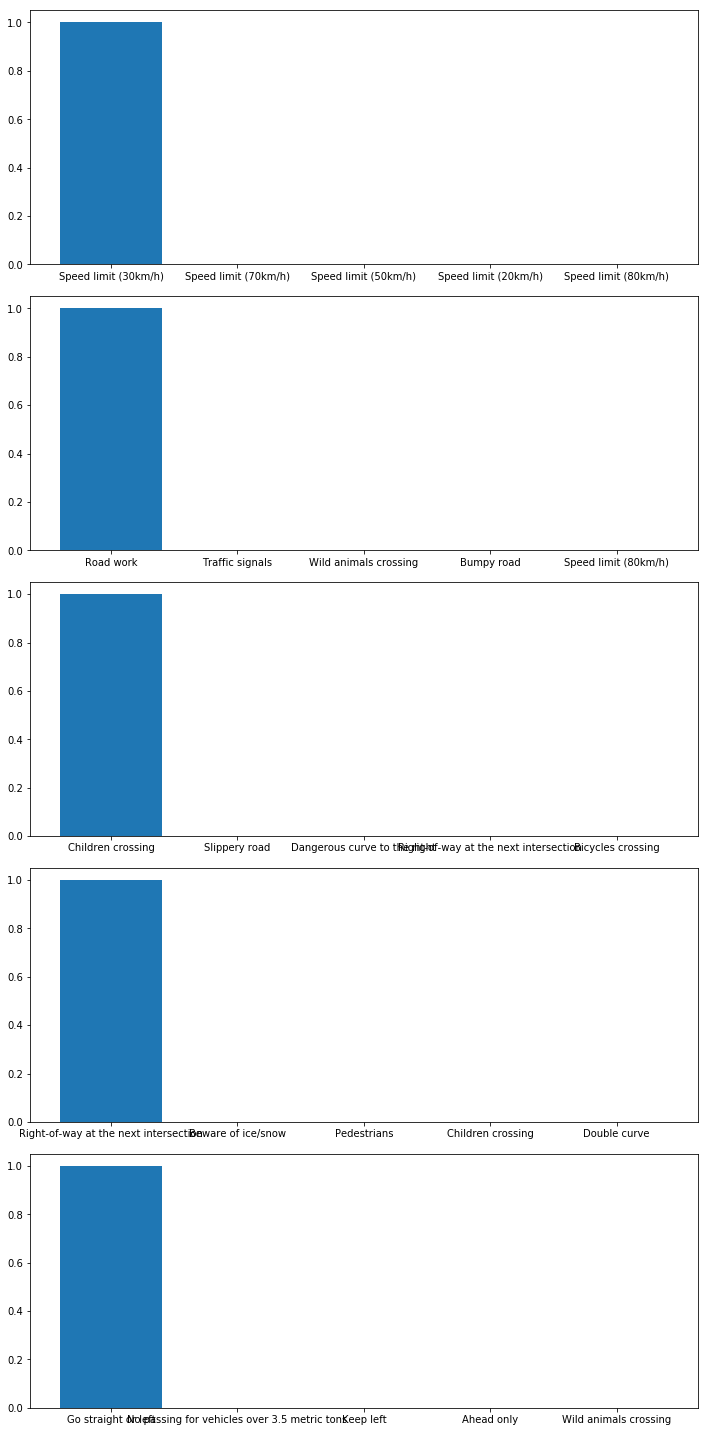

In [45]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess,'./Deepnet')
    web_predict=sess.run(logits, feed_dict={x:img_list,keep_prob1: 1.0,keep_prob2:1.0,keep_prob3:1.0,keep_prob4:1.0})
    fig, ax = plt.subplots(len(web_predict),1,figsize=(10, 20))
    plt.tight_layout()
    for s in range(len(web_predict)):
        softm=sess.run(tf.nn.softmax(web_predict[s]))
        top5=sess.run(tf.nn.top_k(tf.constant(softm), k=5))
        l=['a','a','a','a','a','a']
        for i in range(5):
            l[i+1]=df['SignName'][top5.indices[i]]
            #print(l[i])
        ax[s].set_xticklabels(l)
        ax[s].bar(range(5),top5.values,align="center")

(Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1.Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?

**Answer:**
When the classifier makes an erroneous prediction, it can comprehend what kind of image is not enough for learning by comparing the feature map.